##### ex02.버섯데이터 실습(DecisionTree)
- 분류와 회귀 둘 다 사용 가능

In [57]:
# 라이브러리 불러오기
# pandas, matplotlib, 머신러닝 라이브러리 (분리)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # 데이터 분리 도구
from sklearn.tree import DecisionTreeClassifier   # 의사결정나무 분류 모델 사용

In [58]:
# 데이터 불러오기
# data 변수에 mushroom.csv
data = pd.read_csv('data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [59]:
# 데이터의 크기
data.shape
# => 8124개의 버섯 데이터
# 컬럼 23 = 특성(X)22ea + 라벨(y)1ea

(8124, 23)

In [60]:
# (결측치가 있는 지 없는 지) 데이터 정보 확인
data.info()
# poisonous - 정답 데이터 , non-null - 결측치가 없다
# object - 문자열 -> 인코딩 해줘야 함

# 결측치 확인 : 결측치가 없음을 확인함, 전처리 불필요
# Dtype(데이터 타입) 확인 : Object(문자열)로 되어있기에 *수치형*으로 변경하는 과정 필요(전처리 중에서도 인코딩 작업 필요)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 문제(X)와 답(y)로 분리
- 문제 데이터(X, 특성, 속성, feature) : poisonous 제외한 나머지 22개
- 정답 데이터(y, label, target, class) : poisonous 1개

In [61]:
# 데이터 5개만 확인 가능
data.head()
# 정답 데이터는 문자열이어도 상관 없지만 문제 데이터는 수치형으로 바꿔서 회귀로 사용해야 함

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
# 문제 데이터 추출 (iloc - 컬럼 수가 많기에)
X = data.iloc[ : , 1: ]   # 문제 데이터를 구할 거기에 0번 인덱스는 정답 데이터라 빼고 1번 인덱스에 있는 컬럼부터 들어가야 함
X
# poisonous 없음

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [63]:
# 정답 데이터 추출 (Series 형태로 출력)
y = data['poisonous']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [64]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [65]:
# X의 기술 통계 확인
X.describe()

# count : 데이터의 개수를 단순 count 해주는 방법
# unique : 데이터들의 값 중에서 중복 없이 유일한 값의 개수(하나의 컬럼이 가지고 있는 알파벳의 개수)
# top : unique한 값 중에 가장 많이 등장한 알파벳이 무엇인 지 알려줌(빈도수가 가장 많은 알파벳)
# freq : top의 등장 횟수, 데이터의 빈도수(그 알파벳의 빈도수)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [66]:
# 정답 데이터 확인
y.value_counts()
# e : 식용 , p : 독성 버섯
# 두 개의 클래스(정답)를 가짐
# 한 쪽으로 치우쳐져 있지 않음

poisonous
e    4208
p    3916
Name: count, dtype: int64

## 데이터 전처리
- 문자열 데이터를 수치화 해주는 과정 => 인코딩(Encoding) 작업

-  원 핫 인코딩 : 값이 크고 작음에 **의미가 없을 때** 단지 *구분*을 위해서 인코딩
- 레이블 인코딩 : 값이 크고 작음에 **의미를 주고 싶을 때** 사용하는 인코딩 => 우선순위가 생김

In [67]:
# 원 핫 인코딩 : 값이 크고 작음에 *의미가 없을 때* 단지 *구분*을 위해서 인코딩
# 레이블 인코딩 : 값이 크고 작음에 *의미를 주고 싶을 때* 사용하는 인코딩 - 우선순위가 생김

In [68]:
# 서식지 컬럼을 활용하여 **레이블 인코딩** 작업 진행
data['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [69]:
hb_dic = {   # value 값 habitat와 매칭시키기 - 딕셔너리
    'u' : 0,
    'g' : 1,
    'm' : 2,
    'd' : 3,
    'p' : 4,
    'w' : 5,
    'l' : 6,
}
# map 함수 사용 : hb_dic 키 값에 대응하는 value 값으로 data['habitat']의 값 변경
X['habitat'].map(hb_dic)

0       0
1       1
2       2
3       0
4       1
       ..
8119    6
8120    6
8121    6
8122    6
8123    6
Name: habitat, Length: 8124, dtype: int64

In [70]:
# **one-hot 인코딩** 방식을 이용해 수치화 
# => 크고 작음의 의미가 없을 때, 우선순위가 없을 때 사용하는 방식
# 하나의 컬럼에 있는 unique한 값의 개수만큼 컬럼을 늘려주고 존재하는 알파벳에는 1, 나머지는 0으로 채워서 수치화하는 방식
# pd.get_dummies(데이터) => one-hot 인코딩
X_one_hot = pd.get_dummies(X)  
# 원 핫 인코딩을 하고 싶은 건 X라서 판다스에서 get_dummies로 X를 수치화가 되어있는 X_one_hot으로 데이터 셋 가공해줘야 함

### 실습) train과 test 분리

In [71]:
# random_state : 21, 7 : 3
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3, random_state = 21)

In [72]:
# 데이터 크기 확인하기
print('훈련용 문제 : ', X_train.shape)
print('훈련용 정답 : ', y_train.shape)
print('테스트용 문제 : ', X_test.shape)
print('테스트용 문제 : ', y_test.shape)

훈련용 문제 :  (5686, 117)
훈련용 정답 :  (5686,)
테스트용 문제 :  (2438, 117)
테스트용 문제 :  (2438,)


## 모델 선택 및 하이퍼 파라미터 조정

In [73]:
# 모델 생성
tree_model = DecisionTreeClassifier()    # 하이퍼 파라미터 조정 X

In [74]:
# 모델 학습
tree_model.fit(X_train, y_train)

# 모델 평가
tree_model.score(X_test, y_test)
# => 100(0.1)%의 정확도 - 정확도 너무 높음 - 과대적합 가능성 있음
# 결과 : 1.0 => 과대 적합의 위험성은 없는 지 확인하기

1.0

In [75]:
# 조정해주기
tree_model2 = DecisionTreeClassifier(max_depth = 3)

# 모델 학습
tree_model2.fit(X_train, y_train)

# 모델 평가
tree_model2.score(X_test, y_test)
# => 하이퍼 파라미터를 통해 정확도 조정됨(0.987)

0.9868744872846595

In [76]:
# 우리가 보유한 데이터는 한정적임 : 데이터가 많을수록 과대 적합 제어 가능
# 어떻게 하면 여러 번의 검증을 실시할 수 있을까?
# 보유한 데이터를 여러 번 활용해서 검증하여 성능 확인 : 교차 검증
# 일반화 정도를 확인 

#### 교차 검증(Cross validation)
- 학습-평가 데이터를 골고루 설정하여 모델의 안정성을 높이고 **과대적합을 감소**시키는 통계적 기법
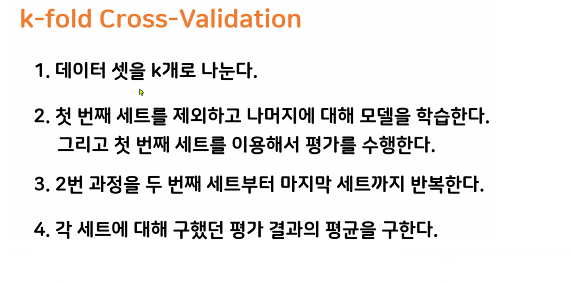
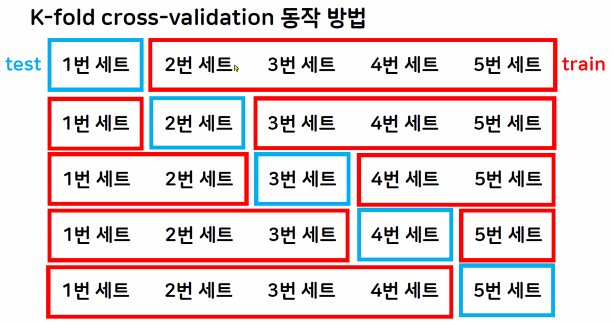
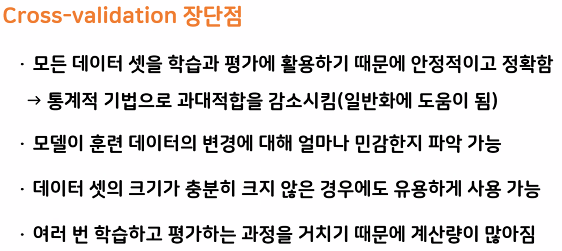

In [77]:
# 교차검증 기능 불러오기
from sklearn.model_selection import cross_val_score

In [78]:
# cross_val_score(모델명, 훈련용 문제, 훈련용 정답, cv = 교차검증의 횟수)
cross_val_score(tree_model, X_train, y_train, cv = 5)
# => 과대 적합이 일어남
# 1이라는 정확도는 과대 적합일 확률이 높다
# hyper parameter가 조정되어있는 tree_model2의 교차검증 진행

array([1., 1., 1., 1., 1.])

In [79]:
# hyper parameter가 조정 되어있는 tree_model2의 교차검증 진행
cross_val_score(tree_model2, X_train, y_train, cv = 5)
# 위의 0.9868744872846595와 비슷하게 0.98이라고 되어있음
# => 일반화 되어있음(정확도 1과 가깝게 비슷함)

array([0.98242531, 0.98504837, 0.98240985, 0.98328936, 0.9876869 ])

### 트리모델 내부 시각화
- 외부 라이브러리인 graphviz 설치

In [80]:
# 외부 라이브러리 설치
!pip install graphviz

# graphviz 경로 다시 한 번 잡아주기
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [81]:
# 현재 우리가 만든 모델을 dot 형태의 파일로 내보내기
from sklearn.tree import export_graphviz   # 내보내기 라이브러리 진행
export_graphviz(
    tree_model,
    out_file = 'data/tree.dot',   # 저장할 경로/파일명, 확장자 설정
    class_names = ['독', '식용'],   # 정답 데이터의 이름 설정
    feature_names = X_one_hot.columns,   # 원 핫 인코딩 된 컬럼 이름으로 특성 넣기
    filled = True,   # 각 노드들의 클래스가 구분되도록 색을 칠해주는 작업의 여부
    impurity = True   # 지니 불순도 출력 여부
)
# => data 파일에 tree.dot 이라는 파일 생김

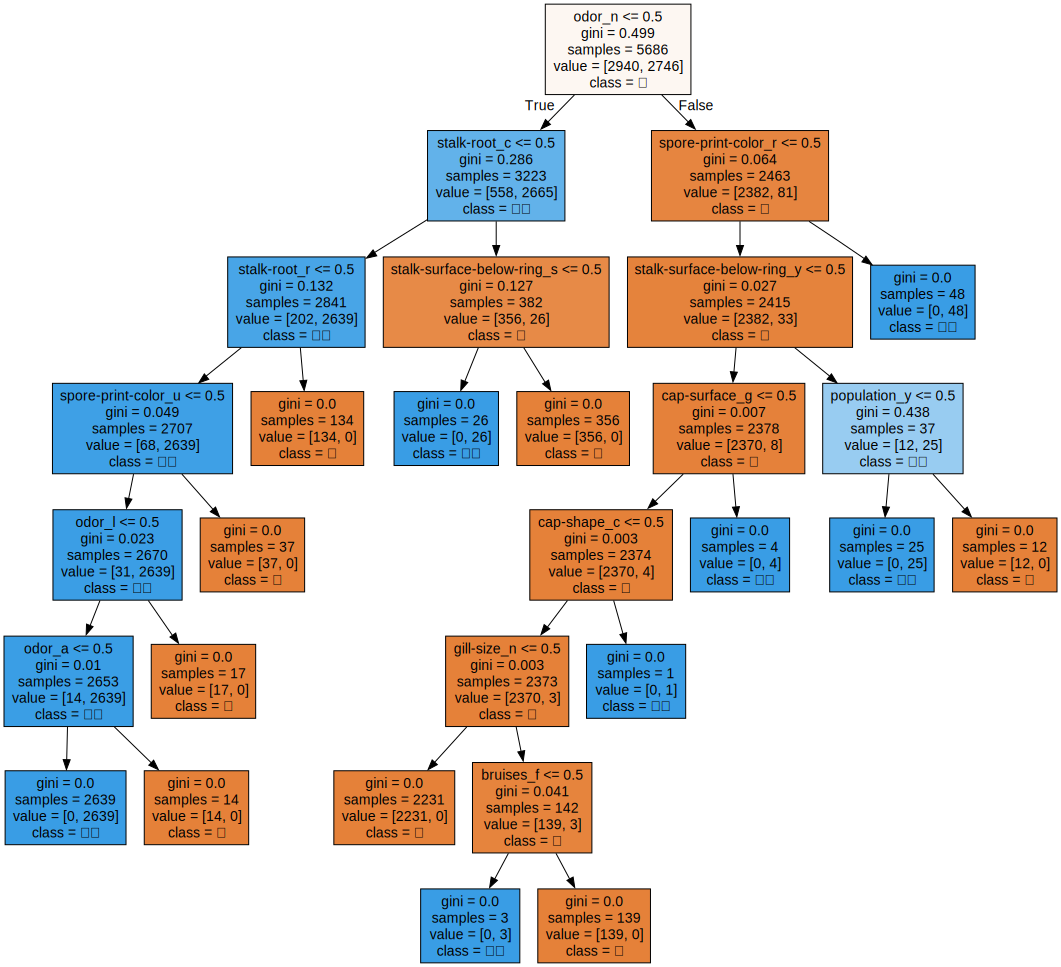

In [82]:
# dot 파일을 불러와서 실제 그래프로 표현하기
import graphviz

# 클래스 이름을 한글로 줘서 한글 인코딩 작업 진행
with open('data/tree.dot', encoding = 'UTF-8') as f :   # f 약어 주기
    dot_graph = f.read()   # dot_graph를 f.read로 초기화 시켜주기

# 그래프를 출력하는 코드
display(graphviz.Source(dot_graph))

# 과적합이 일어나고 있는 트리 구조임 (지니불순도가 0이 될 때까지 노드 구조를 이루고 있음)
# odor(향기)가 n 이냐 라고 묻고 gini 불순도가 0.499인 0.5에 엄청 근접해 있음 / 향기가 n이 맞는 지 틀린 지 -> 맞으면 value의 독성이 558개, 식용이 2665개

In [86]:
# tree_model2를 dot 파일로 내보내기 (file 이름은 tree2.dot으로 모델 내보내기)
export_graphviz(
    tree_model2,
    out_file = 'data/tree2.dot', 
    class_names = ['독', '식용'], 
    feature_names = X_one_hot.columns, 
    filled = True, 
    impurity = True  
)

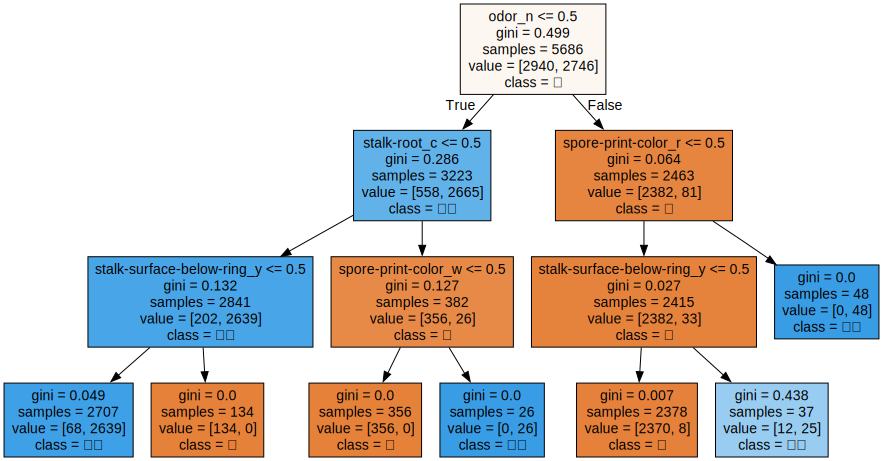

In [90]:
# tree2.dot 파일을 불러와서 시각화 해보기
with open('data/tree2.dot', encoding = 'UTF-8') as f :   
    dot_graph = f.read()  

display(graphviz.Source(dot_graph))

# => 위에서 max_depth를 3으로 지정해줬기에 화살표가 아래로 내려가는 게 세 번만 진행
# tree_model2 = DecisionTreeClassifier(max_depth = 3)

In [91]:
# 왜 ordor_n을 첫 번째 질문으로 했을까?
# 117개의 문제 데이터들이 가지는 중요도를 살펴보자

### 특성 선택
- 각 특성들의 중요도를 출력해보자 (지도 학습에서 가능)
- 정답의 얼마만큼의 영향을 미치는 특성인가를 수치로 확인 가능
- 각 특성들의 중요도는 0 ~ 1 사이의 값을 가진다
- 모든 특성의 중요도 합은 1 이어야 한다!
- tree 모델은 특성의 중요도가 높은 값을 상위 질문(root node)로 배치한다

In [92]:
pd.set_option('display.max_rows', None)

In [96]:
# tree model의 특성 중요도 확인
fi = tree_model.feature_importances_
fi
# => 중요도가 부동 소수점 값으로 나타나있음

# 이 중요도를 DataFrame화 시켜주기
fi_df = pd.DataFrame(fi, index = X_one_hot.columns, columns = ['특성중요도'])

# 특성 중요도를 확인하기 위해 데이터를 내림차순으로 정렬
fi_df.sort_values(by = '특성중요도', ascending =False)   #판다스에서 다룬 내용

# => 트리에서도 odor_n의 여부를 가장 먼저 물었는데 특성중요도에 따라서 중요한 것부터 질문하고 있음

,특성중요도
odor_n,0.619868
stalk-root_c,0.175741
stalk-root_r,0.085464
spore-print-color_r,0.032248
spore-print-color_u,0.025110
stalk-surface-below-ring_s,0.017065
odor_l,0.011772
stalk-surface-below-ring_y,0.011598
odor_a,0.009808
population_y,0.005711


## 정리
- tree 모델 내부 시각화 표를 보면 중요도가 높은 특성이 oder_n이 최상단 질문으로 배치되어 있음을 확인
- 중요도가 가장 높은 컬럼을 가장 먼저 고려해야한다. (불순도가 낮아지는 방향으로 학습)
- 현재 mushroom 데이터는 하나의 특성이 60%가 넘는 중료도를 거지기 때문에 모델 학습이 용이하다

#### 복습
## 머신러닝
1. 지도학습
- 명시적인 답을 알려준 상태로 학습시키는 방법
  - 분류 : 명시적인 답이 범주형 일 때
    - 이진분류, 다중분류 : 명시적인 답의 개수
  - 회귀 : 명시적인 답이 수치형 일 때
    
2. 비지도학습
- 명시적인 답이 없는 상태에서 학습을 시키는 방법
- 데이터의 특징과 패턴을 찾아서 군집화를 시키는 학습 방법
  
3. 강화학습
- 지도학습이랑 비슷함(완전한 답을 제공하지 않음)
- 완전한 답을 제공하지 않고 학습을 하는 방법(ex.알파고)

## KNN모델
- 분류와 회귀에 둘 다 사용할 수 있는 모델
- n_neighbors 파라미터
  - n_neighbors가 너무 작으면 과대적합이 일어날 수 있음(train데이터 정확도가 높지만 test데이터 정확도가 낮아서 과대적합)
  - n_neighbors가 너무 크면 과소적합일 발생할 수 있음
  - n_neighbors 7이 가장 적합
## Decision Tree 모델
- 분류와 회귀에 둘 다 사용할 수 있는 모델
- 스무고개와 비슷한 알고리즘
#### => 교차검증이 있음